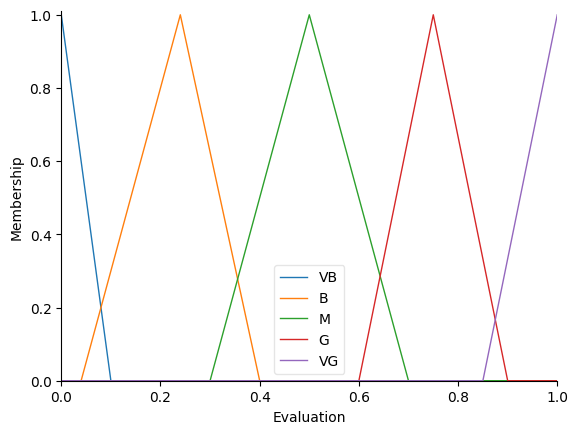

In [324]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

discover = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'discover')
Go = ctrl.Antecedent(np.arange(0, 5.01, 0.01), 'Go')
fitting_room = ctrl.Antecedent(np.arange(0, 8.01, 0.01), 'fitting_room')
cashier = ctrl.Antecedent(np.arange(0, 4.01, 0.01), 'cashier')

E = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'Evaluation')


Go['B'] = fuzz.trimf(Go.universe, [0 , 0 , 1.5])
Go['M'] = fuzz.trimf(Go.universe, [1, 2.5 , 4])
Go['G'] = fuzz.trimf(Go.universe, [3, 5, 5])

discover['B'] = fuzz.trimf(discover.universe, [0 , 0 , 1])
discover['M'] = fuzz.trimf(discover.universe, [0.5, 1.5 , 2.5])
discover['G'] = fuzz.trimf(discover.universe, [2, 3, 3])


fitting_room['B'] = fuzz.trimf(fitting_room.universe, [0 , 0 , 3])
fitting_room['M'] = fuzz.trimf(fitting_room.universe, [2, 4 , 6])
fitting_room['G'] = fuzz.trimf(fitting_room.universe, [5, 8, 8])


cashier['B'] = fuzz.trimf(cashier.universe, [0 , 0 , 1.5])
cashier['M'] = fuzz.trimf(cashier.universe, [1, 2 , 3])
cashier['G'] = fuzz.trimf(cashier.universe, [2.5,4 , 4])

# E['VB'] = fuzz.trapmf(E.universe, [0 , 0 ,0.05, 0.1])
E['VB'] = fuzz.trimf(E.universe, [0 , 0 , 0.1])
E['B'] = fuzz.trimf(E.universe, [0.04 , 0.24 , 0.4])
E['M'] = fuzz.trimf(E.universe, [0.3, 0.5 , 0.7])
E['G'] = fuzz.trimf(E.universe, [0.6,0.75 , 0.9])
E['VG'] = fuzz.trimf(E.universe, [0.85, 1 , 1])

E.view()




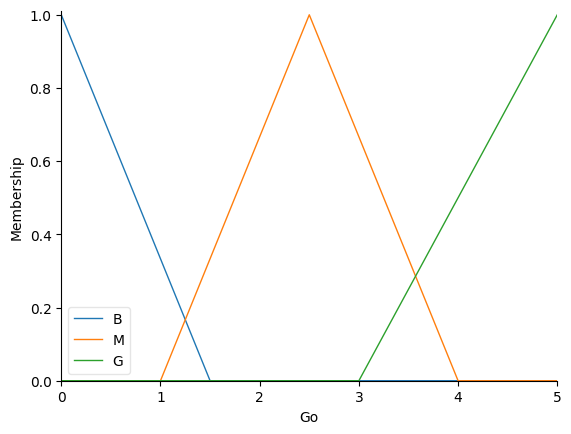

In [325]:
Go.view()

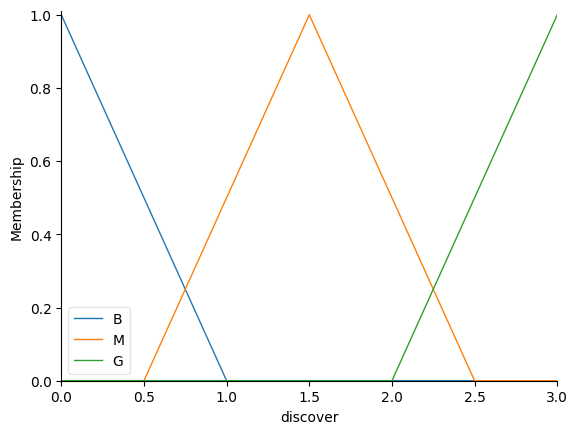

In [326]:
discover.view()


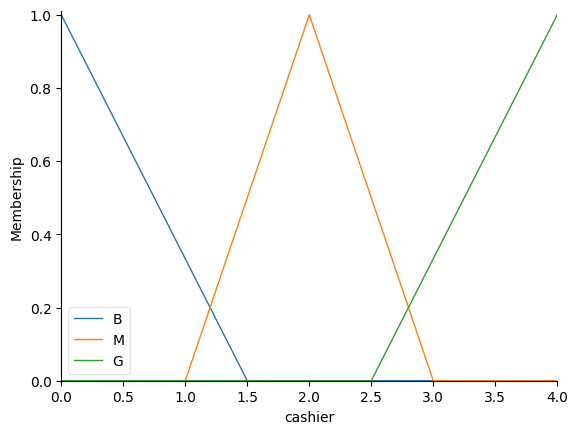

In [327]:
cashier.view()


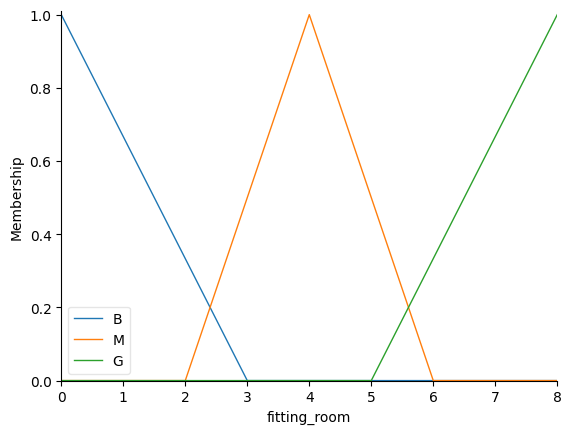

In [328]:
fitting_room.view()


In [329]:
# RULES:

r1 = ctrl.Rule(Go['B'] & fitting_room['B'] & cashier['B'] & discover['B'], E['VB'])



r2 = ctrl.Rule(Go['M'] & fitting_room['B'] & cashier['B'] & discover['B'], E['B'])

r3 = ctrl.Rule(Go['B'] & fitting_room['M'] & cashier['B'] & discover['B'], E['B'])

r4 = ctrl.Rule(Go['B'] & fitting_room['B'] & cashier['M'] & discover['B'], E['B'])

r5 = ctrl.Rule(Go['B'] & fitting_room['B'] & cashier['B'] & discover['M'], E['B'])



r6 = ctrl.Rule(Go['B'] & fitting_room['M'] & cashier['M'] & discover['M'], E['M'])

r7 = ctrl.Rule(Go['M'] & fitting_room['B'] & cashier['M'] & discover['M'], E['M'])

r8 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['B'] & discover['M'], E['M'])

r9 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['M'] & discover['B'], E['M'])



r10 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['M'] & discover['M'], E['M'])



r11 = ctrl.Rule(Go['G'] & fitting_room['M'] & cashier['M'] & discover['M'], E['M'])

r12 = ctrl.Rule(Go['M'] & fitting_room['G'] & cashier['M'] & discover['M'], E['M'])

r13 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['G'] & discover['M'], E['G'])

r14 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['M'] & discover['G'], E['M'])



r15 = ctrl.Rule(Go['G'] & fitting_room['G'] & cashier['B'] & discover['G'], E['M'])

r16 = ctrl.Rule(Go['G'] & fitting_room['B'] & cashier['G'] & discover['B'], E['M'])

r17 = ctrl.Rule(Go['G'] & fitting_room['M'] & cashier['G'] & discover['B'], E['G'])

r18 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['G'] & discover['B'], E['M'])

r19 = ctrl.Rule(Go['B'] & fitting_room['M'] & cashier['G'] & discover['G'], E['M'])

r20 = ctrl.Rule(Go['M'] & fitting_room['B'] & cashier['G'] & discover['B'], E['M'])

r21 = ctrl.Rule(Go['M'] & fitting_room['B'] & cashier['G'] & discover['M'], E['G'])

r22 = ctrl.Rule(Go['M'] & fitting_room['B'] & cashier['B'] & discover['G'], E['B'])

r23 = ctrl.Rule(Go['M'] & fitting_room['G'] & cashier['B'] & discover['B'], E['B'])

r24 = ctrl.Rule(Go['M'] & fitting_room['M'] & cashier['B'] & discover['B'], E['B'])

r25 = ctrl.Rule(Go['M'] & fitting_room['B'] & cashier['B'] & discover['M'], E['B'])



r26 = ctrl.Rule(Go['M'] & fitting_room['G'] & cashier['G'] & discover['G'], E['G'])

r27 = ctrl.Rule(Go['G'] & fitting_room['M'] & cashier['G'] & discover['G'], E['G'])

r28 = ctrl.Rule(Go['G'] & fitting_room['G'] & cashier['M'] & discover['G'], E['G'])

r29 = ctrl.Rule(Go['G'] & fitting_room['G'] & cashier['G'] & discover['M'], E['G'])



r30 = ctrl.Rule(Go['G'] & fitting_room['G'] & cashier['G'] & discover['G'], E['VG'])

In [330]:
Spare_Management = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,
                                       r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,
                                       r21,r22,r23,r24,r25,r26,r27,r28,r29,r30])

SM = ctrl.ControlSystemSimulation(Spare_Management)

In [331]:
# # from Admin
# SM.input['Go'] = 0 # max 5
# SM.input['fitting_room'] = 0 # max 8
# SM.input['cashier'] = 0 # max 4
# SM.input['discover'] = 0 # max 3

# SM.compute()
# print(SM.output['Evaluation'])

In [332]:
# from Admin
SM.input['Go'] = 5 # max 5
SM.input['fitting_room'] = 8 # max 8
SM.input['cashier'] = 4 # max 4
SM.input['discover'] = 3 # max 3

SM.compute()
print(SM.output['Evaluation'])

0.9500000000000002


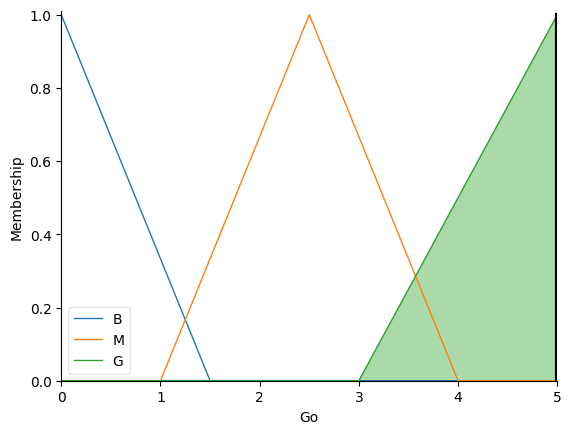

In [333]:
Go.view(sim=SM)

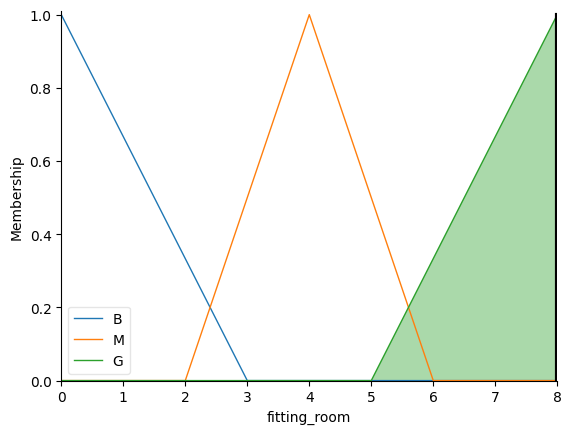

In [334]:
fitting_room.view(sim=SM)

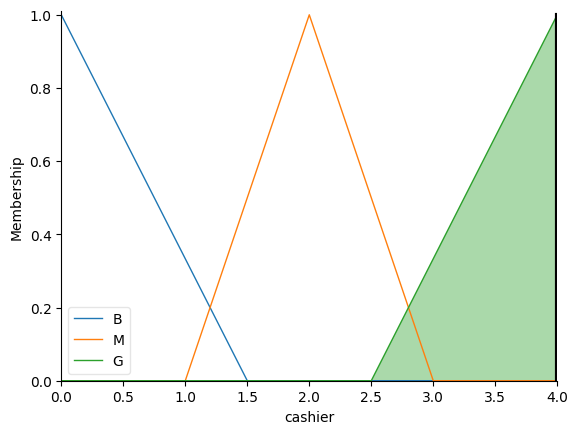

In [335]:
cashier.view(sim=SM)

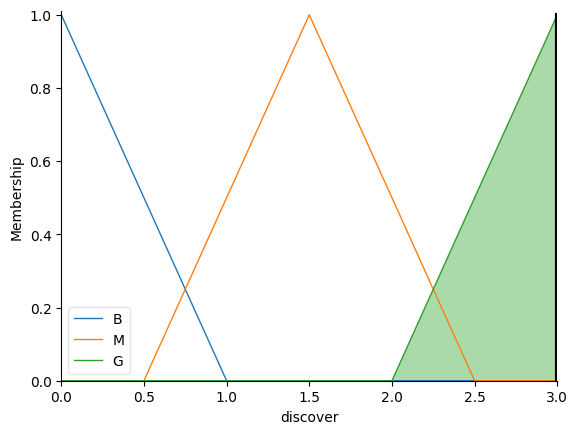

In [336]:
discover.view(sim=SM)

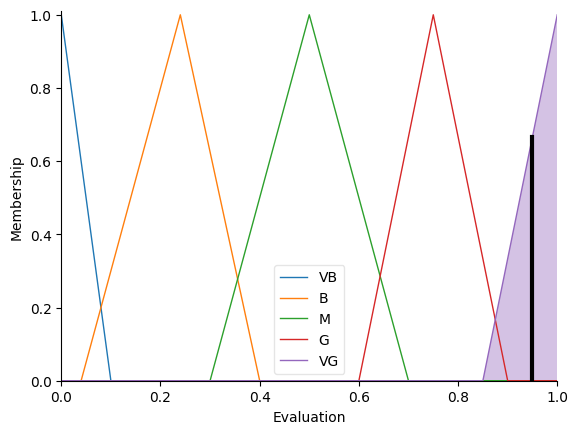

In [337]:
E.view(sim=SM)